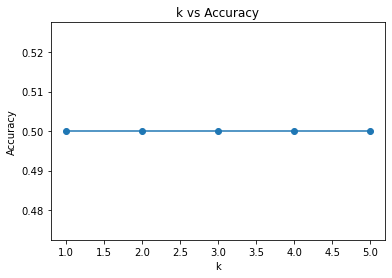

Best k for maximum accuracy: 1
Final Accuracy: 0.5
Confusion Matrix:
[[0. 1.]
 [0. 1.]]


In [7]:
#Implement K-NN Classifier for classification of any dataset of your choice.
import numpy as np

# Step a: Load an existing dataset (for demonstration, we'll use a simple dataset)
def load_dataset():
    # Dummy dataset for demonstration
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
    y = np.array([0, 0, 1, 1, 1, 0])  # Binary classification labels
    return X, y

# Step b: Split the dataset into train and test sets
def train_test_split(X, y, test_size=0.2):
    split_idx = int((1 - test_size) * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

# Step c: Implement K-NN Classifier
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.argmax(np.bincount(k_nearest_labels))
    return most_common

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_true)):
        matrix[y_true[i], y_pred[i]] += 1
    return matrix

# Step d: Find the effect of the value of K on accuracy/performance
def knn_classifier(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = [predict(X_train, y_train, x_test, k) for x_test in X_test]
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

# Utility function to plot k vs accuracy curve
import matplotlib.pyplot as plt

def plot_k_vs_accuracy(k_values, accuracies):
    plt.plot(k_values, accuracies, marker='o')
    plt.title('k vs Accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

if __name__ == "__main__":
    X, y = load_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    k_values = range(1, 6)  # Try k values from 1 to 5
    accuracies = knn_classifier(X_train, X_test, y_train, y_test, k_values)
    plot_k_vs_accuracy(k_values, accuracies)

    best_k = k_values[np.argmax(accuracies)]
    print("Best k for maximum accuracy:", best_k)

    # Retrain with best k and get final accuracy and confusion matrix
    y_pred = [predict(X_train, y_train, x_test, best_k) for x_test in X_test]
    final_accuracy = accuracy(y_test, y_pred)
    print("Final Accuracy:", final_accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
